In [10]:
import pandas as pd

# --- Load weekly data (all at week-end, e.g. Sundays) ---
intake_path = "total_intake_weekly.csv"
macro_path = "df_macro_weekly.csv"
index_path = "df_index_weekly.csv"

df_intake = pd.read_csv(intake_path, parse_dates=['week_end'])
df_macro  = pd.read_csv(macro_path,  parse_dates=['week_end'])
df_index  = pd.read_csv(index_path,  parse_dates=['week_end'])

print("Intake weekly:")
display(df_intake.head())
print(df_intake.info())

print("\nMacro weekly:")
display(df_macro.head())
print(df_macro.info())

print("\nIndex weekly:")
display(df_index.head())
print(df_index.info())

# --- 1) Merge intake with macro on week_end ---
df_all = (
    df_intake
      .merge(df_macro, on='week_end', how='inner')   # only weeks present in both
)

# --- 2) Merge result with index features on week_end ---
df_all = df_all.merge(df_index, on='week_end', how='inner')

print("\nAfter merging intake + macro + index:")
print(df_all.shape)
display(df_all.head())

# (Optional but helpful) Rename week_end → date for modeling
df_all = df_all.rename(columns={'week_end': 'date'})


Intake weekly:


,week_end,number_of_people
0,2021-03-07,40.0
1,2021-03-14,133.0
2,2021-03-21,60.0
3,2021-03-28,94.0
4,2021-04-04,48.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   week_end          242 non-null    datetime64[ns]
 1   number_of_people  242 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB
None

Macro weekly:


,week_end,goc_long_benchmark,goc_long_benchmark1,goc_2y_benchmark,goc_3y_benchmark,goc_5y_benchmark,goc_7y_benchmark,goc_10y_benchmark,goc_avg_over10y,spread_10y_2y,...,TBCDN1YMID,FXUSDCAD,FXEURCAD,EURUSD,USDCAD_ret,DGS10,DFF,T10YIE,DTWEXBGS,CPIAUCSL
0,2021-03-07,1.830,0.166,0.264,0.392,0.844,1.088,1.414,1.750,1.150,...,0.174,1.26446,1.52008,1.202163,-0.000266,1.488,0.070,2.198,112.86818,264.8470
1,2021-03-14,1.898,0.190,0.272,0.494,0.930,1.206,1.480,1.822,1.208,...,0.192,1.25972,1.50092,1.191486,-0.002775,1.570,0.070,2.244,113.56036,264.8470
2,2021-03-21,2.048,0.292,0.284,0.534,1.010,1.280,1.576,1.962,1.292,...,0.172,1.24728,1.48610,1.191473,0.000210,1.664,0.070,2.290,113.03020,264.8470
3,2021-03-28,1.950,0.190,0.242,0.486,0.938,1.196,1.492,1.876,1.250,...,0.150,1.25646,1.48766,1.184021,0.001183,1.648,0.070,2.318,113.55108,264.8470
4,2021-04-04,1.962,0.220,0.224,0.484,0.974,1.232,1.526,1.892,1.302,...,0.148,1.25860,1.47918,1.175260,-0.000395,1.722,0.068,2.358,113.89766,265.5582


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   week_end             242 non-null    datetime64[ns]
 1   goc_long_benchmark   242 non-null    float64       
 2   goc_long_benchmark1  242 non-null    float64       
 3   goc_2y_benchmark     242 non-null    float64       
 4   goc_3y_benchmark     242 non-null    float64       
 5   goc_5y_benchmark     242 non-null    float64       
 6   goc_7y_benchmark     242 non-null    float64       
 7   goc_10y_benchmark    242 non-null    float64       
 8   goc_avg_over10y      242 non-null    float64       
 9   spread_10y_2y        242 non-null    float64       
 10  spread_10y_5y        242 non-null    float64       
 11  V39079               242 non-null    float64       
 12  AVGINTWO             242 non-null    float64       
 13  TBCDN30DMID          242 non-null  

,week_end,macro_economy_text_information,woodgreen_housing_demand_text_information,woodgreen_cost_of_living_text_information,woodgreen_employment_text_information,woodgreen_mental_health_text_information,woodgreen_food_security_text_information,woodgreen_newcomer_settlement_text_information,woodgreen_seniors_care_text_information,woodgreen_family_violence_text_information
0,2021-03-07,-0.542208,0.621375,0.136496,-1.221134,1.028172,0.091205,0.540295,0.461096,1.860368
1,2021-03-14,-0.454451,0.609887,0.126942,-1.323509,1.050778,-0.023830,0.479005,0.398797,1.704761
2,2021-03-21,-0.366695,0.598398,0.117389,-1.425885,1.073384,-0.138866,0.417715,0.336499,1.549153
3,2021-03-28,-0.278938,0.586910,0.107835,-1.528261,1.095989,-0.253901,0.356426,0.274200,1.393546
4,2021-04-04,-0.223556,0.570998,0.097724,-1.619435,1.129172,-0.336463,0.304243,0.215908,1.264500


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   week_end                                        242 non-null    datetime64[ns]
 1   macro_economy_text_information                  242 non-null    float64       
 2   woodgreen_housing_demand_text_information       242 non-null    float64       
 3   woodgreen_cost_of_living_text_information       242 non-null    float64       
 4   woodgreen_employment_text_information           242 non-null    float64       
 5   woodgreen_mental_health_text_information        242 non-null    float64       
 6   woodgreen_food_security_text_information        242 non-null    float64       
 7   woodgreen_newcomer_settlement_text_information  242 non-null    float64       
 8   woodgreen_seniors_care_text_information         24

,week_end,number_of_people,goc_long_benchmark,goc_long_benchmark1,goc_2y_benchmark,goc_3y_benchmark,goc_5y_benchmark,goc_7y_benchmark,goc_10y_benchmark,goc_avg_over10y,...,CPIAUCSL,macro_economy_text_information,woodgreen_housing_demand_text_information,woodgreen_cost_of_living_text_information,woodgreen_employment_text_information,woodgreen_mental_health_text_information,woodgreen_food_security_text_information,woodgreen_newcomer_settlement_text_information,woodgreen_seniors_care_text_information,woodgreen_family_violence_text_information
0,2021-03-07,40.0,1.830,0.166,0.264,0.392,0.844,1.088,1.414,1.750,...,264.8470,-0.542208,0.621375,0.136496,-1.221134,1.028172,0.091205,0.540295,0.461096,1.860368
1,2021-03-14,133.0,1.898,0.190,0.272,0.494,0.930,1.206,1.480,1.822,...,264.8470,-0.454451,0.609887,0.126942,-1.323509,1.050778,-0.023830,0.479005,0.398797,1.704761
2,2021-03-21,60.0,2.048,0.292,0.284,0.534,1.010,1.280,1.576,1.962,...,264.8470,-0.366695,0.598398,0.117389,-1.425885,1.073384,-0.138866,0.417715,0.336499,1.549153
3,2021-03-28,94.0,1.950,0.190,0.242,0.486,0.938,1.196,1.492,1.876,...,264.8470,-0.278938,0.586910,0.107835,-1.528261,1.095989,-0.253901,0.356426,0.274200,1.393546
4,2021-04-04,48.0,1.962,0.220,0.224,0.484,0.974,1.232,1.526,1.892,...,265.5582,-0.223556,0.570998,0.097724,-1.619435,1.129172,-0.336463,0.304243,0.215908,1.264500


In [11]:
# --- 3) Keep only weeks where all needed numeric features exist ---

# All numeric columns (target + predictors)
numeric_cols = df_all.select_dtypes(include='number').columns.tolist()

print("\nTotal numeric columns:", len(numeric_cols))
print("Example numeric columns:", numeric_cols[:10])

# Drop any week that is missing numeric features
before = df_all.shape[0]
df_all = df_all.dropna(subset=numeric_cols)
after = df_all.shape[0]

print(f"\nRows before dropna: {before}, after dropna: {after}")
display(df_all.head())



Total numeric columns: 35
Example numeric columns: ['number_of_people', 'goc_long_benchmark', 'goc_long_benchmark1', 'goc_2y_benchmark', 'goc_3y_benchmark', 'goc_5y_benchmark', 'goc_7y_benchmark', 'goc_10y_benchmark', 'goc_avg_over10y', 'spread_10y_2y']

Rows before dropna: 242, after dropna: 242


,date,number_of_people,goc_long_benchmark,goc_long_benchmark1,goc_2y_benchmark,goc_3y_benchmark,goc_5y_benchmark,goc_7y_benchmark,goc_10y_benchmark,goc_avg_over10y,...,CPIAUCSL,macro_economy_text_information,woodgreen_housing_demand_text_information,woodgreen_cost_of_living_text_information,woodgreen_employment_text_information,woodgreen_mental_health_text_information,woodgreen_food_security_text_information,woodgreen_newcomer_settlement_text_information,woodgreen_seniors_care_text_information,woodgreen_family_violence_text_information
0,2021-03-07,40.0,1.830,0.166,0.264,0.392,0.844,1.088,1.414,1.750,...,264.8470,-0.542208,0.621375,0.136496,-1.221134,1.028172,0.091205,0.540295,0.461096,1.860368
1,2021-03-14,133.0,1.898,0.190,0.272,0.494,0.930,1.206,1.480,1.822,...,264.8470,-0.454451,0.609887,0.126942,-1.323509,1.050778,-0.023830,0.479005,0.398797,1.704761
2,2021-03-21,60.0,2.048,0.292,0.284,0.534,1.010,1.280,1.576,1.962,...,264.8470,-0.366695,0.598398,0.117389,-1.425885,1.073384,-0.138866,0.417715,0.336499,1.549153
3,2021-03-28,94.0,1.950,0.190,0.242,0.486,0.938,1.196,1.492,1.876,...,264.8470,-0.278938,0.586910,0.107835,-1.528261,1.095989,-0.253901,0.356426,0.274200,1.393546
4,2021-04-04,48.0,1.962,0.220,0.224,0.484,0.974,1.232,1.526,1.892,...,265.5582,-0.223556,0.570998,0.097724,-1.619435,1.129172,-0.336463,0.304243,0.215908,1.264500


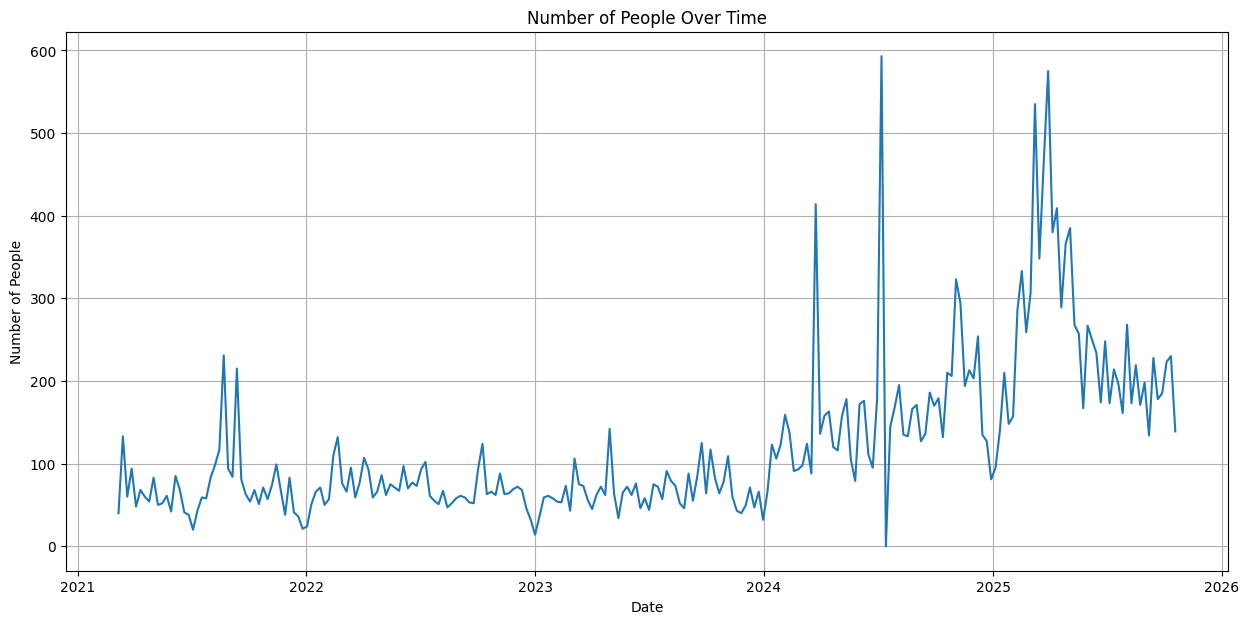

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a line plot for 'number of people' over time
plt.figure(figsize=(15, 7))
sns.lineplot(x='date', y='number_of_people', data=df_all)
plt.title('Number of People Over Time')
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.grid(True)
plt.show()

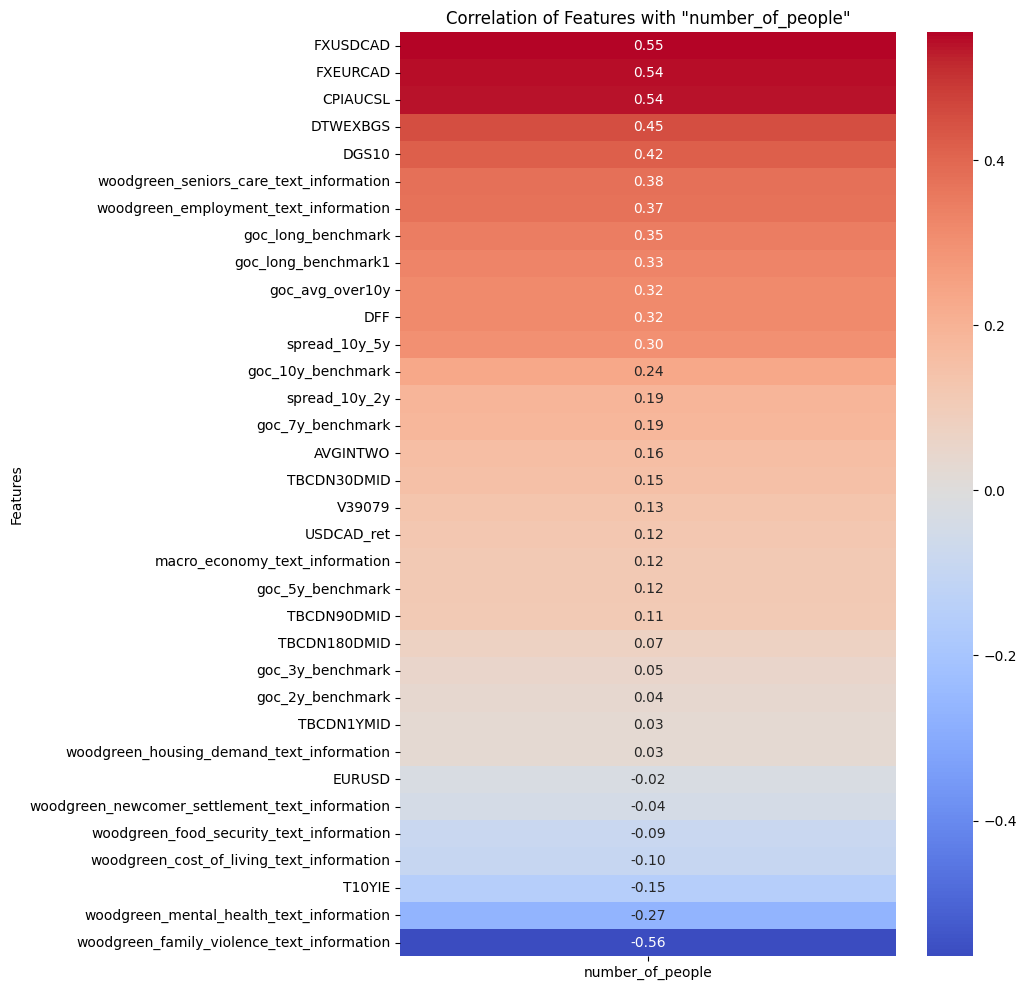

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude 'date' column for correlation calculation as it's not a numerical feature
df_numerical = df_all.drop(columns=['date'])

# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Extract correlations with 'number_of_people'
# We use .loc to ensure we get the column and then drop 'number_of_people' itself
correlation_with_people = correlation_matrix['number_of_people'].drop('number_of_people')

# Sort the correlations for better visualization (optional but good practice)
correlation_with_people_sorted = correlation_with_people.sort_values(ascending=False)

# Create a heatmap
plt.figure(figsize=(8, 12))
sns.heatmap(correlation_with_people_sorted.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation of Features with "number_of_people"')
plt.ylabel('Features')
plt.show()

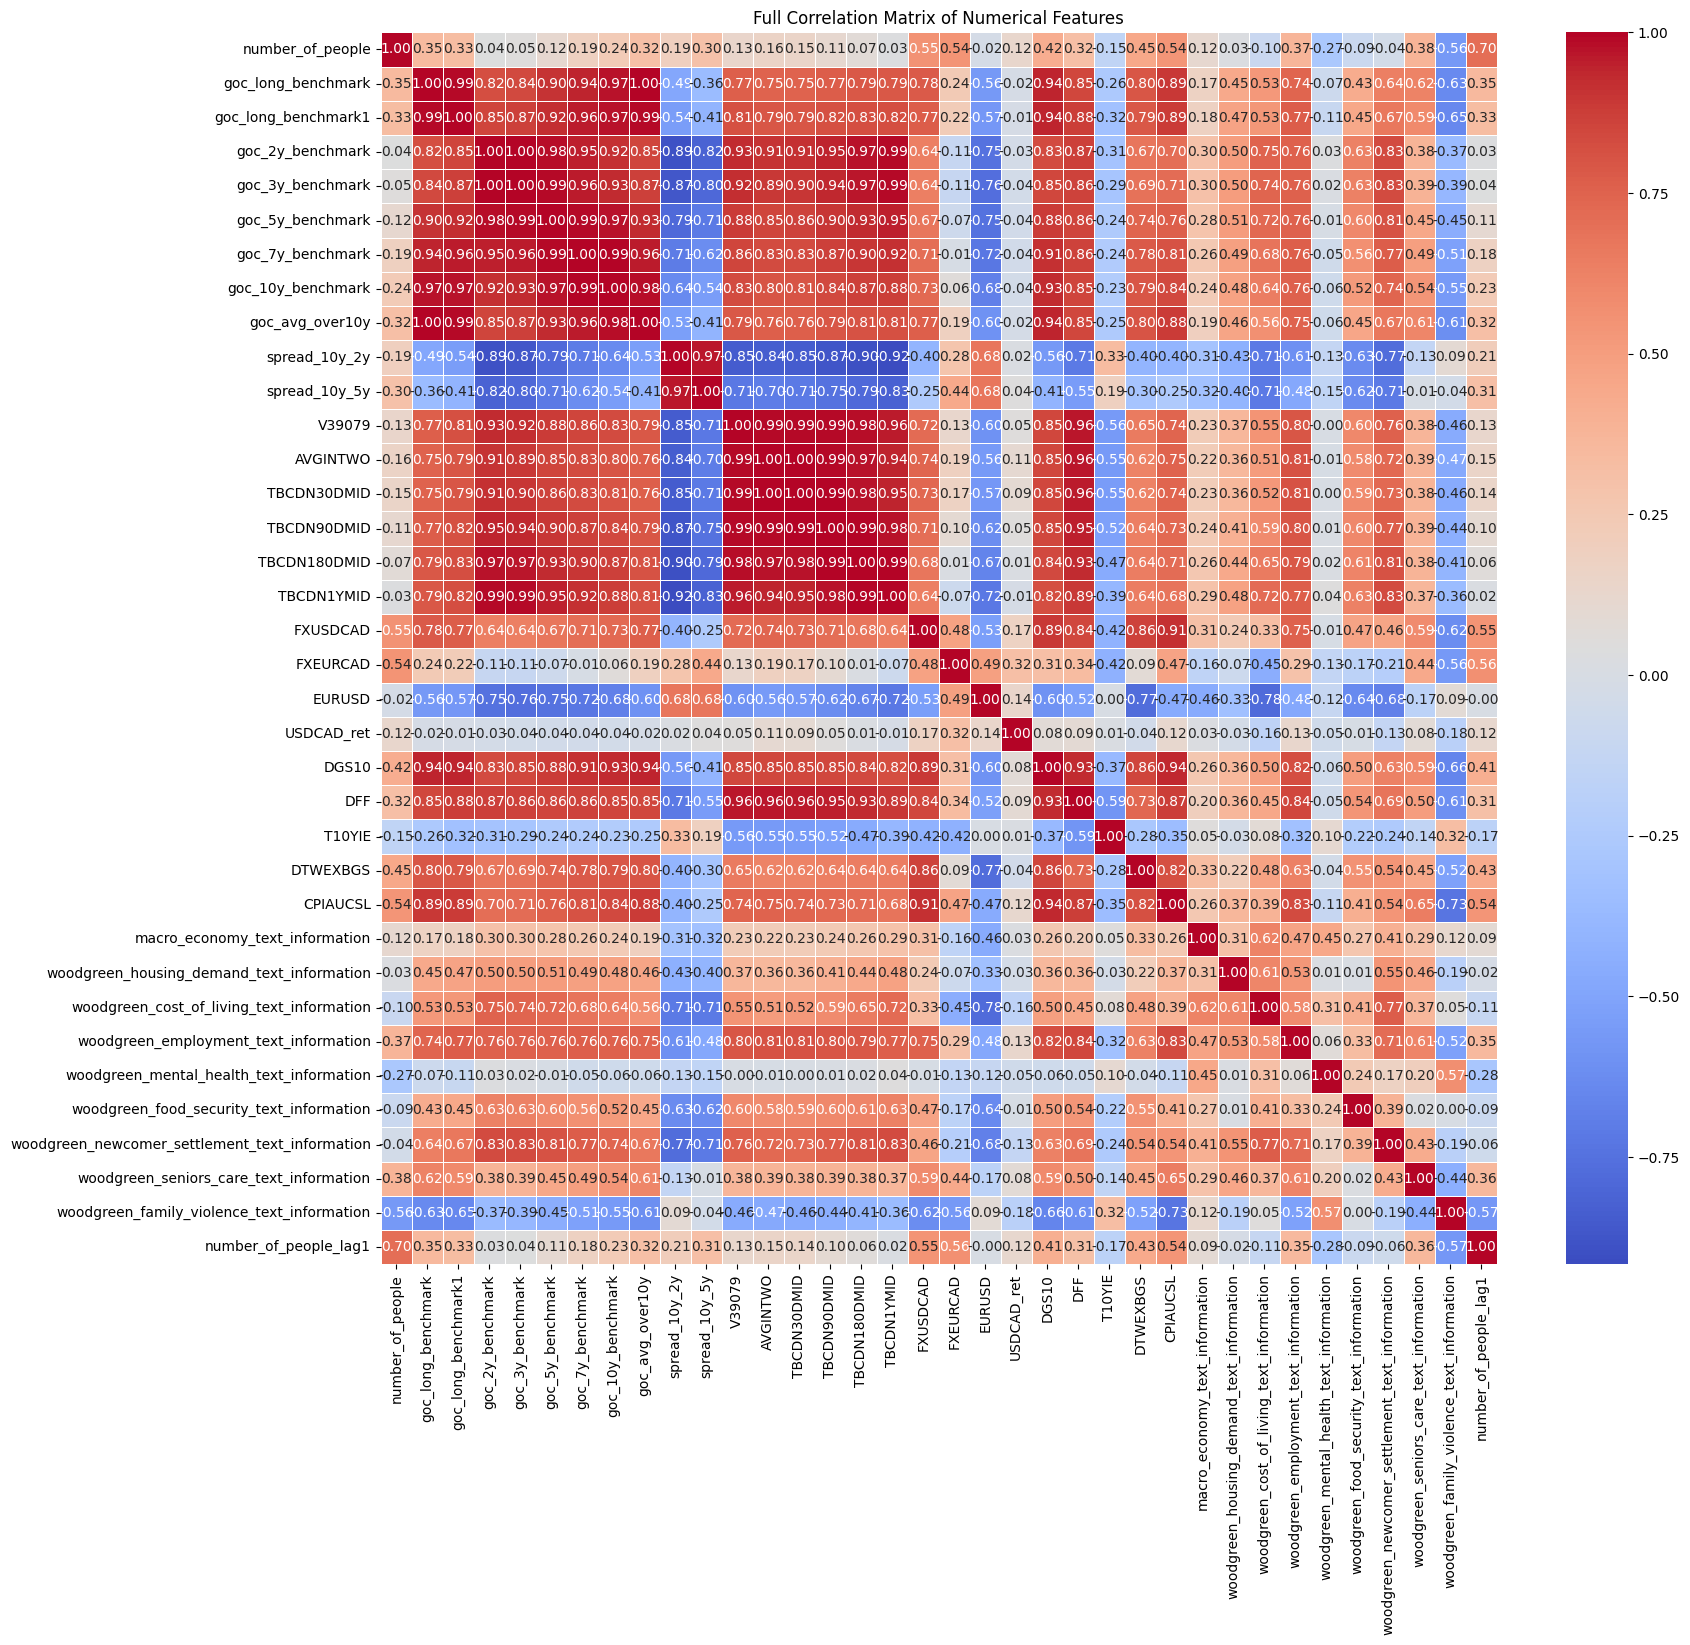

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude 'date' column for correlation calculation
df_numerical = df_all.drop(columns=['date'])

# Calculate the full correlation matrix
full_correlation_matrix = df_numerical.corr()

# Create a heatmap of the full correlation matrix
plt.figure(figsize=(18, 16)) # Adjust figure size for better readability with many features
sns.heatmap(full_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, linewidths=.5)
plt.title('Full Correlation Matrix of Numerical Features')
plt.show()

In [13]:
# --- 4) Add simple lag features (no leakage) ---

# Sort by time (and by program_name if it exists)
sort_keys = ['date']
if 'program_name' in df_all.columns:
    sort_keys = ['program_name', 'date']

df_all = df_all.sort_values(sort_keys).reset_index(drop=True)

target_col = 'number_of_people'

# Example in the instructions:
# df = df.sort_values(["program_name", "date"])
# df["number_of_people_lag1"] = df.groupby("program_name")["number_of_people"].shift(1)

if 'program_name' in df_all.columns:
    df_all['number_of_people_lag1'] = (
        df_all.groupby('program_name')[target_col].shift(1)
    )
else:
    # No program_name → just a single series
    df_all['number_of_people_lag1'] = df_all[target_col].shift(1)

print("\nAfter adding target lag:")
display(df_all[['date', target_col, 'number_of_people_lag1']].head(10))



After adding target lag:


,date,number_of_people,number_of_people_lag1
0,2021-03-07,40.0,NaN
1,2021-03-14,133.0,40.0
2,2021-03-21,60.0,133.0
3,2021-03-28,94.0,60.0
4,2021-04-04,48.0,94.0
5,2021-04-11,68.0,48.0
6,2021-04-18,60.0,68.0
7,2021-04-25,54.0,60.0
8,2021-05-02,83.0,54.0
9,2021-05-09,50.0,83.0



--- Lagged Correlations ---
Lagged Correlations with 'number_of_people':


,1,2,3,4,5,6,7,8,9,10,11,12,13,14
goc_long_benchmark,0.339359,0.339433,0.331751,0.326008,0.326979,0.320159,0.322912,0.326411,0.331981,0.335564,0.334837,0.328363,0.32515,0.336358
goc_long_benchmark1,0.325948,0.327819,0.320697,0.316511,0.320064,0.313619,0.316202,0.318093,0.322636,0.324312,0.325719,0.321002,0.319627,0.33271
goc_2y_benchmark,0.041221,0.049,0.052199,0.059865,0.066995,0.071001,0.080858,0.08867,0.099966,0.109862,0.116226,0.122126,0.129762,0.144111
goc_3y_benchmark,0.052785,0.059972,0.06222,0.069202,0.076467,0.080105,0.089753,0.097755,0.109052,0.118506,0.124699,0.129447,0.136725,0.152213
goc_5y_benchmark,0.114735,0.119123,0.118601,0.122475,0.129949,0.131579,0.140885,0.148423,0.158947,0.167402,0.171153,0.17236,0.177215,0.192774
goc_7y_benchmark,0.184157,0.187842,0.186463,0.189369,0.195548,0.195021,0.203558,0.210482,0.219999,0.22714,0.229813,0.229776,0.234027,0.248725
goc_10y_benchmark,0.231564,0.234205,0.230918,0.231788,0.236564,0.234695,0.242261,0.248012,0.256355,0.262418,0.264189,0.262181,0.264448,0.278167
goc_avg_over10y,0.309246,0.310002,0.302604,0.298807,0.300686,0.294504,0.298334,0.302182,0.307931,0.311627,0.311251,0.305368,0.30287,0.314543
spread_10y_2y,0.181243,0.169422,0.159709,0.146,0.137686,0.127872,0.117319,0.10858,0.095862,0.083263,0.072673,0.058535,0.045711,0.032559
spread_10y_5y,0.29029,0.282506,0.274644,0.263338,0.250547,0.238945,0.227719,0.217268,0.203253,0.18988,0.180937,0.169488,0.157287,0.139721


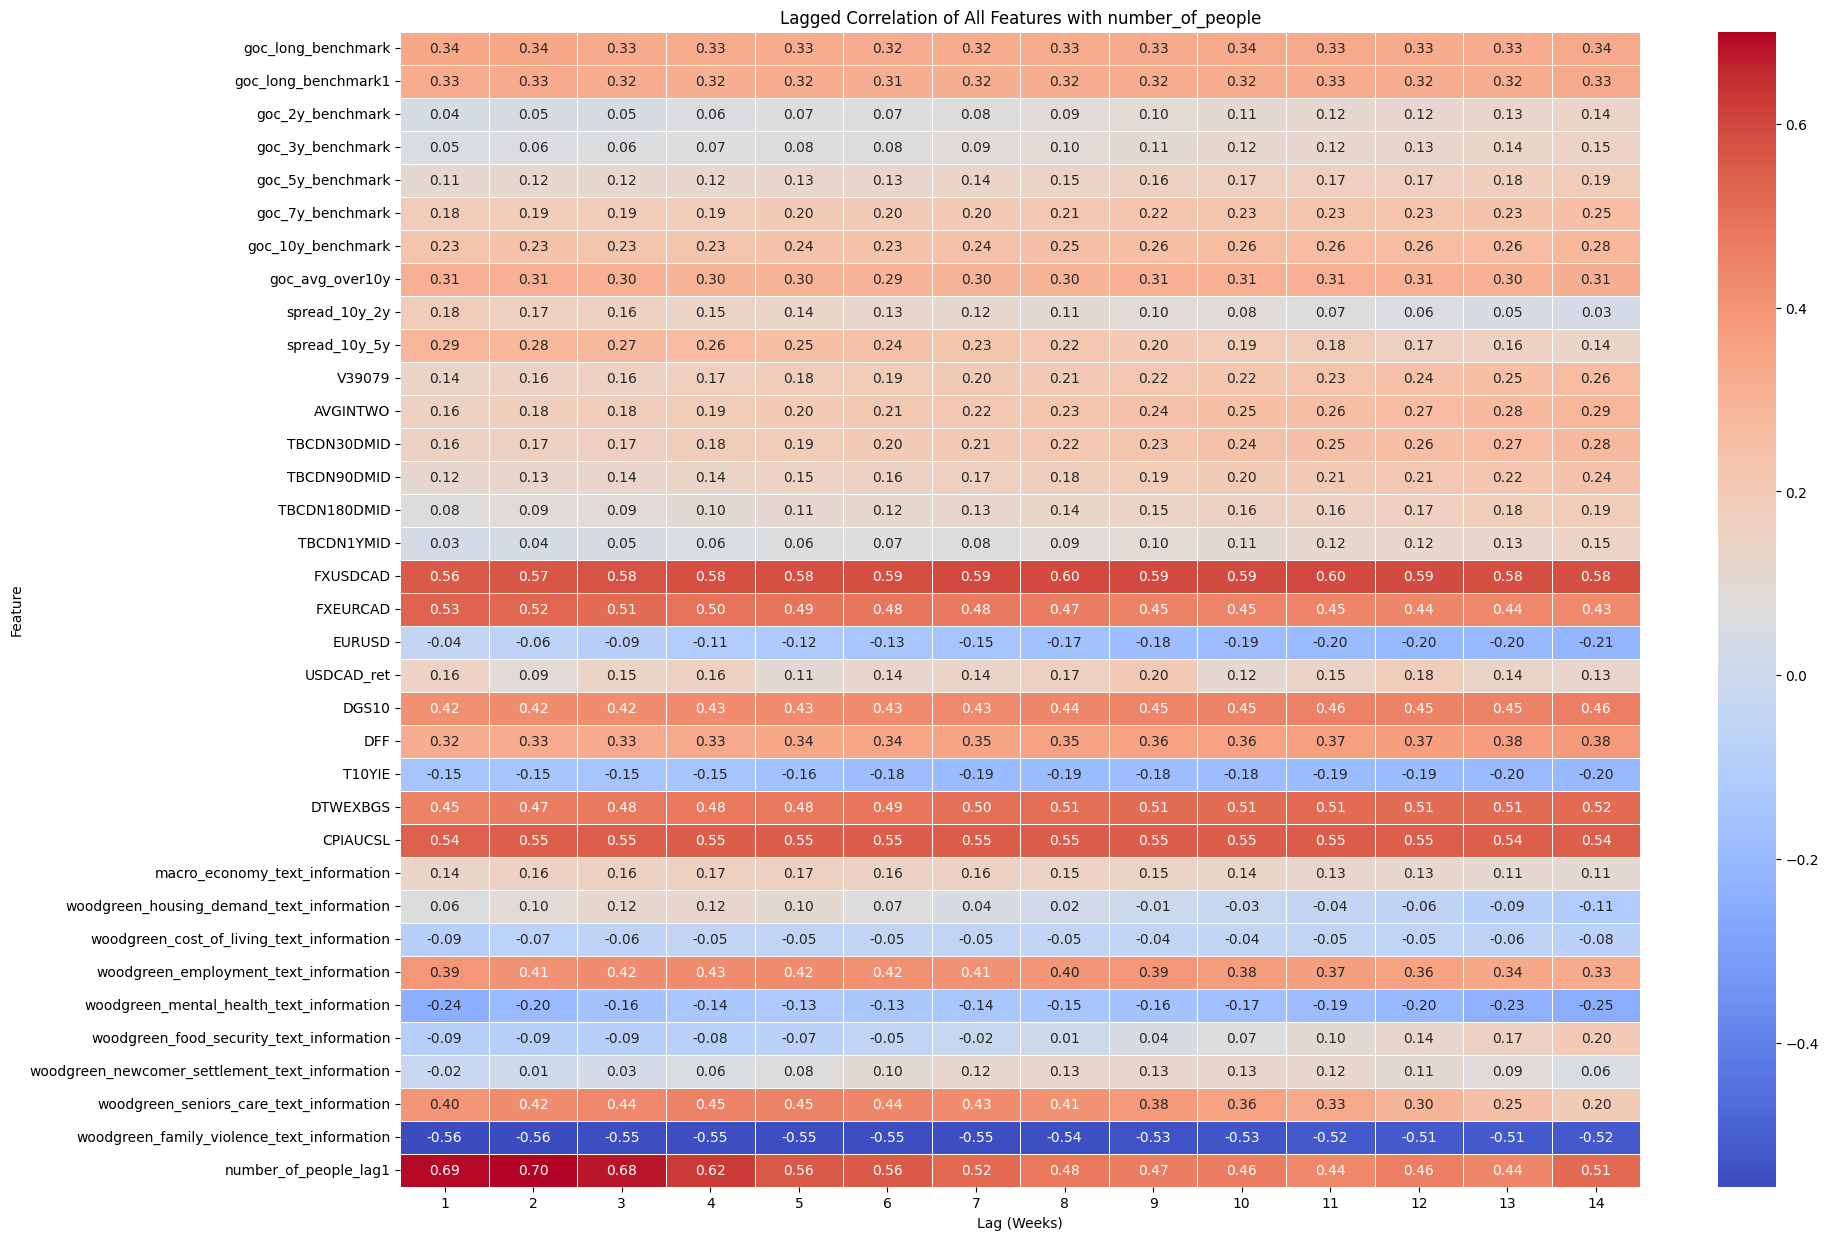


--- Moving Averages ---


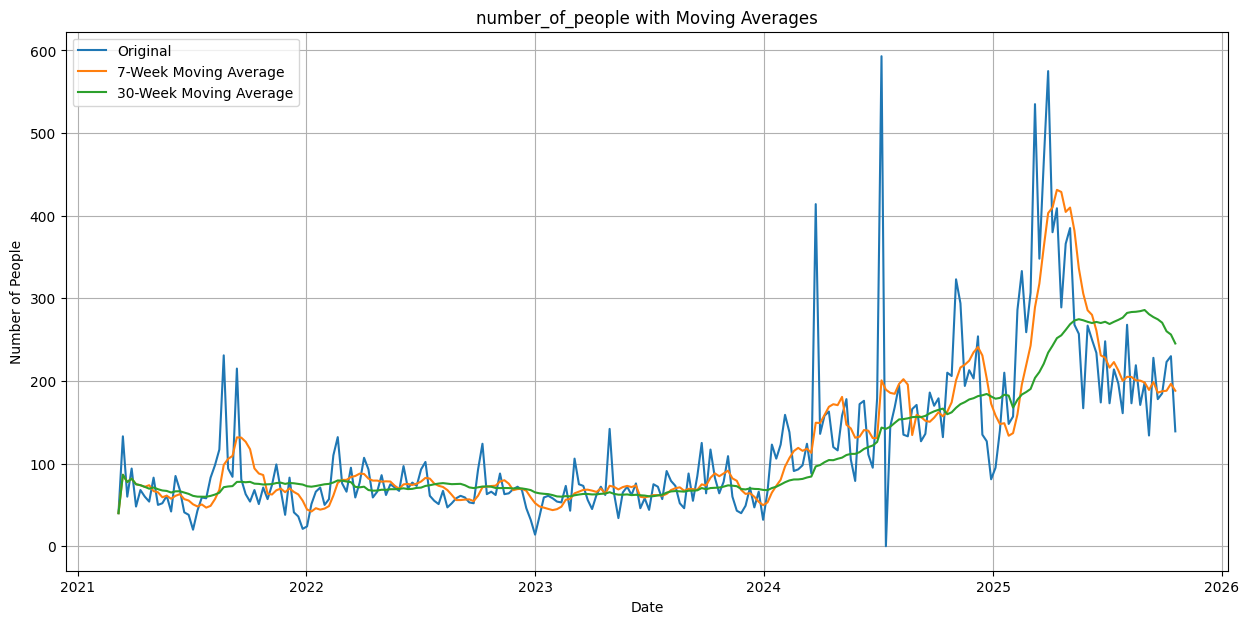

First few rows of df_all with moving averages:


,number_of_people,number_of_people_MA7,number_of_people_MA30
0,40.0,40.000000,40.000000
1,133.0,86.500000,86.500000
2,60.0,77.666667,77.666667
3,94.0,81.750000,81.750000
4,48.0,75.000000,75.000000


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the dataframe is sorted by date for time-series operations
df_all = df_all.sort_values(by='date').reset_index(drop=True)

# --- Lagged Correlations ---
print("\n--- Lagged Correlations ---")

target_variable = 'number_of_people'
# Select all features for lagged correlation analysis, excluding 'date' and the target itself
all_columns = df_all.columns.tolist()
features_for_lagged_corr = [col for col in all_columns if col not in ['date', target_variable, 'number_of_people_MA7', 'number_of_people_MA30']]

max_lag = 14 # Analyze correlations up to 14 weeks lag

lagged_correlations = pd.DataFrame(index=features_for_lagged_corr, columns=range(1, max_lag + 1))

for feature in features_for_lagged_corr:
    for lag in range(1, max_lag + 1):
        # Create a lagged version of the feature
        lagged_feature = df_all[feature].shift(lag)
        # Calculate correlation, dropping NaNs introduced by shifting
        correlation = df_all[target_variable].corr(lagged_feature)
        lagged_correlations.loc[feature, lag] = correlation

print("Lagged Correlations with 'number_of_people':")
display(lagged_correlations)

# Visualize lagged correlations
plt.figure(figsize=(20, 15)) # Increased figure size for more features
sns.heatmap(lagged_correlations.astype(float), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title(f'Lagged Correlation of All Features with {target_variable}')
plt.xlabel('Lag (Weeks)')
plt.ylabel('Feature')
plt.show()

# --- Moving Averages ---
print("\n--- Moving Averages ---")

# Calculate moving averages for 'number of people'
df_all['number_of_people_MA7'] = df_all[target_variable].rolling(window=7, min_periods=1).mean()
df_all['number_of_people_MA30'] = df_all[target_variable].rolling(window=30, min_periods=1).mean()

# Plot 'number of people' with its moving averages
plt.figure(figsize=(15, 7))
sns.lineplot(x='date', y=target_variable, data=df_all, label='Original')
sns.lineplot(x='date', y='number_of_people_MA7', data=df_all, label='7-Week Moving Average')
sns.lineplot(x='date', y='number_of_people_MA30', data=df_all, label='30-Week Moving Average')
plt.title(f'{target_variable} with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.legend()
plt.grid(True)
plt.show()

print("First few rows of df_all with moving averages:")
display(df_all[[target_variable, 'number_of_people_MA7', 'number_of_people_MA30']].head())